#### **Load dataset**

First, we'll import packages that we will use throughout the project in order to analyze the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

We will now read the dataset and examine the first 10 rows of the dataset to get familiar with column names and data

In [2]:
# Pandas is used to load the dataset
df = pd.read_csv(r'C:\Users\Saran\Documents\Python Portfolio Projects\Salifort Motors\HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## **Understanding the data**

Let's understand the variables and clean our dataset! We will first examine the size of our dataset to get a better understanding how many variables we are dealing with and how big the dataset is as well.

In [3]:
df.shape

(14999, 10)

There are 10 columns (10 variables), and 14999 rows (employees) recorded in the dataset. 

In [4]:
# info() is used to get some general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


It seems like there are no missing data points in the dataset due to the fact that all `Non-Null` values of each variable is `14999`.

To double check this, we can use `.isna()`

In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

We will now examine the data types of the variables.

In [6]:
print(df.dtypes)
print()
print(df.dtypes.value_counts())

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

int64      6
float64    2
object     2
Name: count, dtype: int64


There are 6 integer variables, 2 float variables and 2 object variables (`salary` and `Department`). Note that we can transform these categorical variables into some numbers that have some value to distinguish each category. 

Let's now examine some basic descriptive statistics about the data

In [7]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


While going through the descriptive statistics we can note a few things:
1) The mean `satisfaction_level` is 0.61 and this variable is a value between 0-1. If we consider 0.5 as average, that means that the mean satisfaction score of these employees is above average. 
2) The mean `average_monthly_hours` is `201` hours. If we take into consideration that and regular employee who works 40 hours a week for approximately 4.2 weeks a month, their average monthly hours of work should be around `168` hours a month. Therefore, the mean `average_monthly_hours` is well over the average hours an employee works a month. Does this mean employees are getting over worked at Salifort Motors? 
3) There are 10 `Departments` and 3 levels of `salary`


In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Note that some column names are misspelt or are capitalized. We want to make sure that the all columns follow the `snake_case` rule where everything is lowercased and all words are split by underscores (_).

The columns that seem to be renamed are: `average_montly_hours`, `Work_accident`, `Department`.

In [9]:
df = df.rename(columns={"average_montly_hours":"average_monthly_hours",
                        "Work_accident": "work_accident",
                        "Department":"department"})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### **Check duplicates**

Let's now check if there are any duplicates within the dataset. We are doing this to make sure that there are not any multiple entries of employee records within the dataset so that we can avoid any biases when we analyze the dataset.

In [10]:
df.duplicated().sum()

3008

There are supposedly 3008 rows that contain duplicates which is a lot because there are 14999 rows within the dataset itself. Let’s inspect these rows.

In [11]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Note that there are several continuous variables within the dataset as well as several discrete variables. The likelihood of these all being unique is extremely low so let’s consider these entries as duplicated entries and drop them from the dataset. 

In [12]:
df = df.drop_duplicates(keep="first")
df.shape

(11991, 10)

Now we are left with `11991` entries instead of `14999`

#### **Group dataset and examine some values**

Let's now group the data by those who `left` and those who `stayed`. From here we'll inspect the mean values of each column and see if we can determine any patterns / relationships.

In [13]:
df.groupby('left').mean(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


`satisfaction_level`
* Note that the mean `satisfaction_level` of those who `left` is 0.227 less than those who `stayed`.

`average_monthly_hours`
* Note that the mean `average_monthly_hours` of those who `left` worked 8 hours more than those who `stayed`.

`last_evaluation`
* The difference between `last_evaluation` score of those who `left` compared to those who `stayed` is miniscule 
* This may imply that the variable `last_evaluation` may not impact the variable `left` (this is useful information when we examine our model).

These are just some early numbers and inferences we can make with just these basic values. 


## **Data visualization**

Let’s use some data visualization tools to understand the spread/distribution of the dataset and see if we can detect any outliers using boxplots. 

We will also use these graphs to get a better understanding of any patterns/trends we can denote.


In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### **Checking variable distribution and outliers**
#### **satisfaction_level**

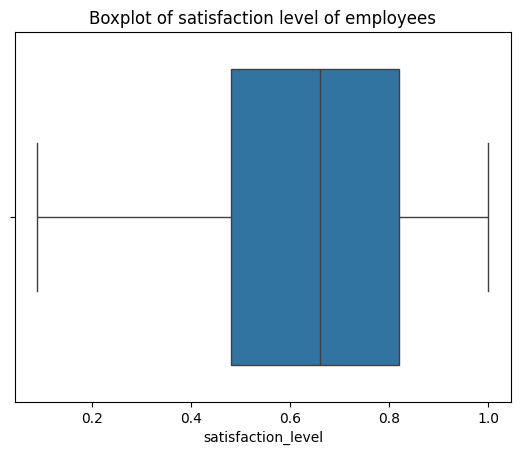

In [15]:
sns.boxplot(data = df, x = 'satisfaction_level')
plt.title('Boxplot of satisfaction level of employees')
plt.show()

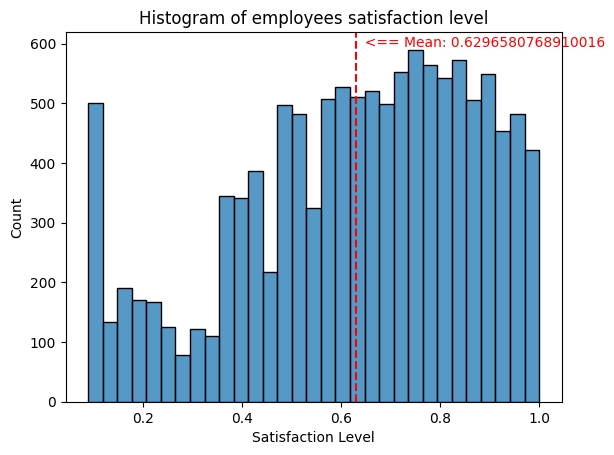

In [16]:
sns.histplot(data = df, x = 'satisfaction_level')
mean = df['satisfaction_level'].mean()
plt.axvline(mean, color = 'red', linestyle = '--')
plt.text(mean, 595, '  <== Mean: {}'.format((mean)), color = 'red')
plt.title('Histogram of employees satisfaction level')
plt.xlabel('Satisfaction Level')
plt.show()

Note that the boxplot shows no indication of outliers and the histogram actually shows a left-skewed distribution indicating that satisfaction levels are above 0.5 (which is considered average). The mean satisfaction level is actually `0.63` which is above average.

Since we are going to be generating several boxplots / histograms to check distribution/spread and outliers we will just create a function that generates these graphs.


In [17]:
def boxmaker (variable):
    """ 
    This function will generate a boxplot which will help us determine any outliers within the dataset. 

    Parameters:
            variable(str): The name of the variable where we want to generate the boxplot.
    """
    sns.boxplot(data = df,  x = variable)
    plt.title('Boxplot of {}'.format(variable).replace('_',' '))
    plt.show()    

In [18]:
def histmaker(variable):
    """ 
    This function will generate a histogram of the variable which we are analyzing. From this histogram we 
    can determine the distribution of the variable as well as see and patters/trends with the dataset. 

    Parameters:
            variable(str): The name of the variable where we want to generate the histogram.
    """
    sns.histplot(data = df, x = variable)
    mean = df[variable].mean()
    plt.axvline(mean, color = 'red', linestyle = '--')
    plt.text(mean, 500, '  <== Mean: {}'.format(mean), color = 'red')
    plt.show()

#### **last_evaluation**

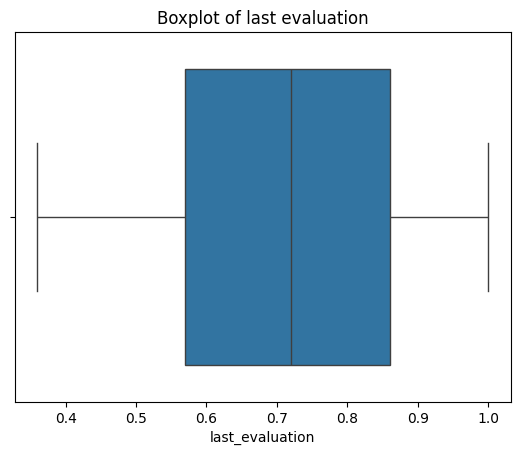

In [19]:
boxmaker('last_evaluation')

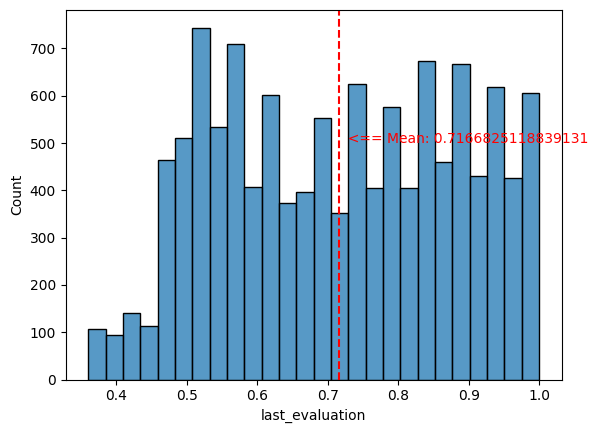

In [20]:
histmaker('last_evaluation')

Note that the boxplot does not show any outliers and the mean score for `last_evalution` is 0.72. Also note that it seems like lowest score is around 0.35 based off the graph (we also saw this from the descriptive statistics). A mean of `0.72` could imply that employee's evaluation scores on their last assessment are above average (`0.5`)

#### **number_project**

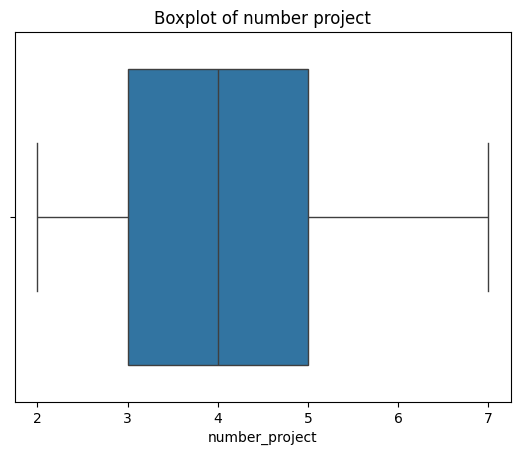

In [21]:
boxmaker('number_project')

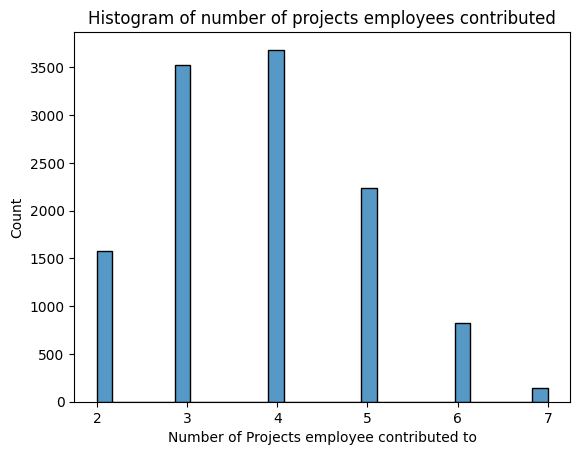

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64 

number_project
4    0.307314
3    0.293553
5    0.186223
2    0.131932
6    0.068885
7    0.012092
Name: proportion, dtype: float64


In [22]:
sns.histplot(data = df, x ='number_project')
plt.title('Histogram of number of projects employees contributed')
plt.xlabel('Number of Projects employee contributed to')
plt.show()
print(df['number_project'].value_counts(), '\n')
print(df['number_project'].value_counts(normalize=True))

From the histogram we can see that most employees worked around 3-4 projects. We also used `.value_counts()` to see that only `145` employees contributed to 7 projects. Later we can analyze if there are any trends with `number_project` variable with other variables as well. 

#### **average_monthly_hours**

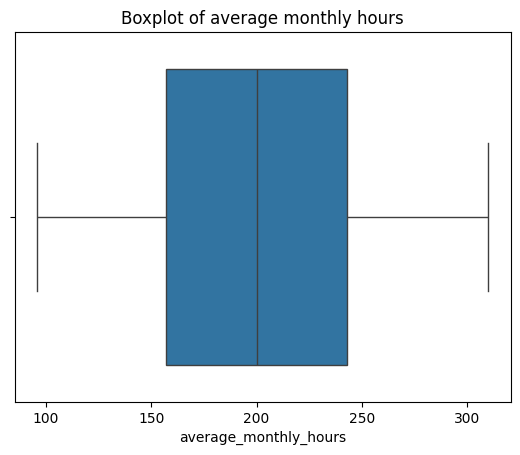

In [23]:
boxmaker('average_monthly_hours')

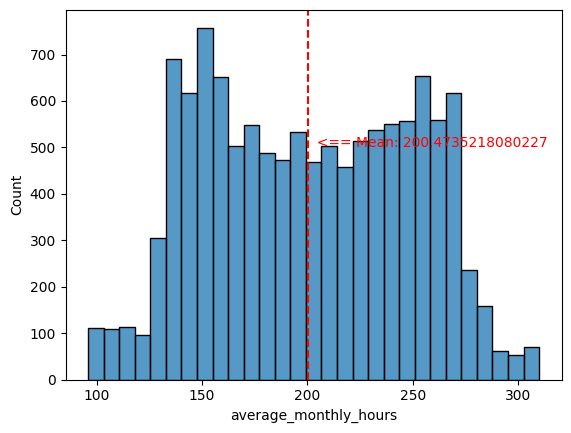

In [24]:
histmaker('average_monthly_hours')

There appears to be no outliers in terms of this variable however, the distribution is bimodal where it seems like some employees are working around 250hours and some are working 150hours. Maybe this correlates to the number of projects they are working on? The mean number of hours of working is 200 per month. If we take into consideration that a usual worker works 8hrs a day for 5 days per week and they are working for approximately 4.2 weeks a month, this equates to working 168 hours a month. This mean monthly hours of work is well over the usual average monthly hours for a normal 9am-5pm worker. 

#### **time_spend_company**

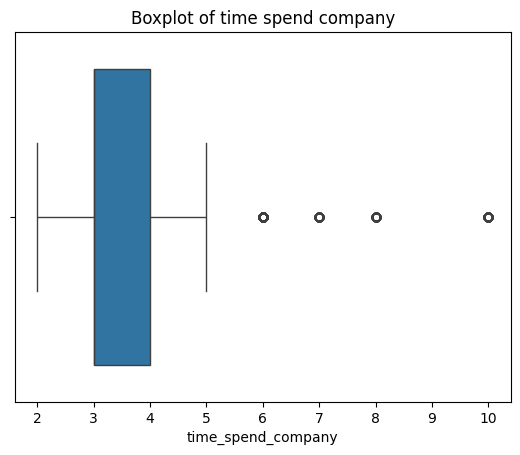

In [25]:
boxmaker('time_spend_company')

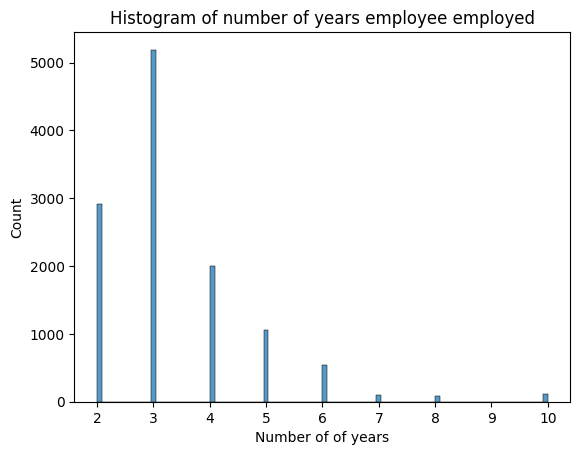

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64 

time_spend_company
3     0.432825
2     0.242682
4     0.167209
5     0.088566
6     0.045201
10    0.008923
7     0.007839
8     0.006755
Name: proportion, dtype: float64


In [26]:
sns.histplot(data = df, x ='time_spend_company')
plt.title('Histogram of number of years employee employed')
plt.xlabel('Number of of years')
plt.show()
print(df['time_spend_company'].value_counts(), '\n')
print(df['time_spend_company'].value_counts(normalize=True))

We notice outliers within the dataset of those who work more than 6 years at the company. Also, from this histogram we can notice a huge drop off from year 3 and year 4. What exactly happens after the 3rd year of the employees who work there? Is there some sort of evaluation that terminate employee’s contracts? We can also see that there are no employees that worked for `9` years at the company and those who worked `7`, `8` or`10` years at the company only equate to `2.4%` of total employees. 

Let’s examine how many employees are considered outliers under `time_spend_company`

In [28]:
percent25 = df['time_spend_company'].quantile(0.25)
percent75 = df['time_spend_company'].quantile(0.75)

iqr = percent75 - percent25

upper_limit = percent75 + iqr*1.5
lower_limit = percent25 - iqr*1.5

outliers = df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)]

print("The Upper limit is: {} \nThe Lower limit is: {}".format(upper_limit,lower_limit))
print("\nThe number of rows in the dataset containing outliers in 'time_spend_company' is: {}".format(len(outliers)))


The Upper limit is: 5.5 
The Lower limit is: 1.5

The number of rows in the dataset containing outliers in 'time_spend_company' is: 824


Therefore, there are 824 employees whom were considered outliers within this variable. When we construct our predictive model, we have to take into consideration of these outliers and determine whether we need to keep them or remove them. However, if it comes to just analyzing the data through graphs and numbers, we don’t have to remove the outliers just yet. We still have much more to investigate with this data set so we will decide later on what to do with these outliers. 

Since the rest of the variables are categorical variables, we'll just create histograms and display the counts of each category within each variable. 

In [29]:
def cat_var (variable):
    """ 
    This function will print out the values for each category as well as the percentage of values within each
    category

    Parameter:
            variable(str): The variable of interest we want to count
    """
    plt.figure(figsize=(12,8))
    sns.histplot(data = df, x =variable)
    plt.title('Histogram of {}'.format(variable))
    plt.show()
    print(df[variable].value_counts())
    print(df[variable].value_counts(normalize = True))

#### **work_accident**

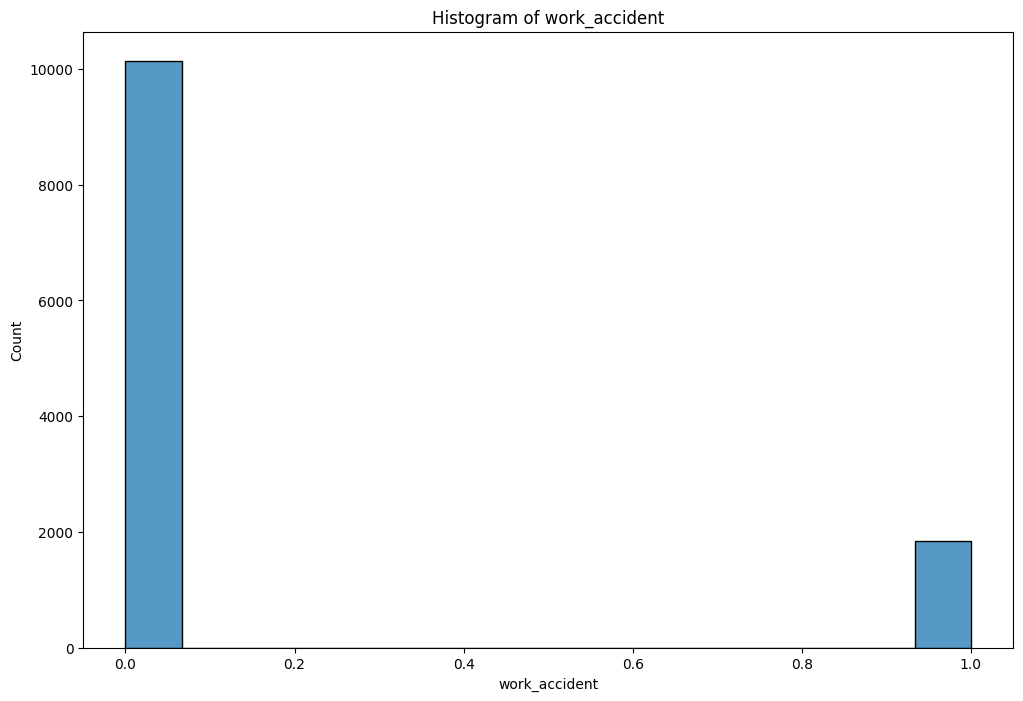

work_accident
0    10141
1     1850
Name: count, dtype: int64
work_accident
0    0.845718
1    0.154282
Name: proportion, dtype: float64


In [30]:
cat_var('work_accident')

It seems like only `15%` of worker have experienced 1 or more accident while working at Salifort Motors. We can maybe examine `work_accident` with variable such as `satisfaction_level`, `time_spent_company` or `number_project` to see if there are any relationships between these variables. 

#### **left**

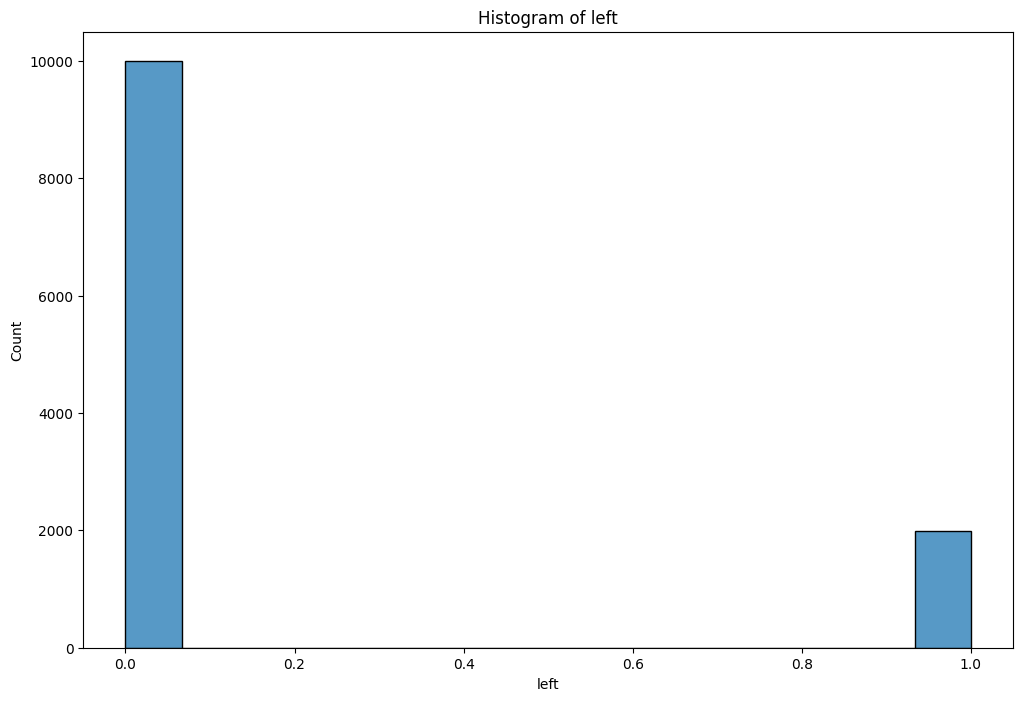

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In [31]:
cat_var('left')

`16.6%` of workers left the company. This is the main variable of focus and we'll use multitude of statistical tools to examine why employees left.

#### **promotion_last_5years**

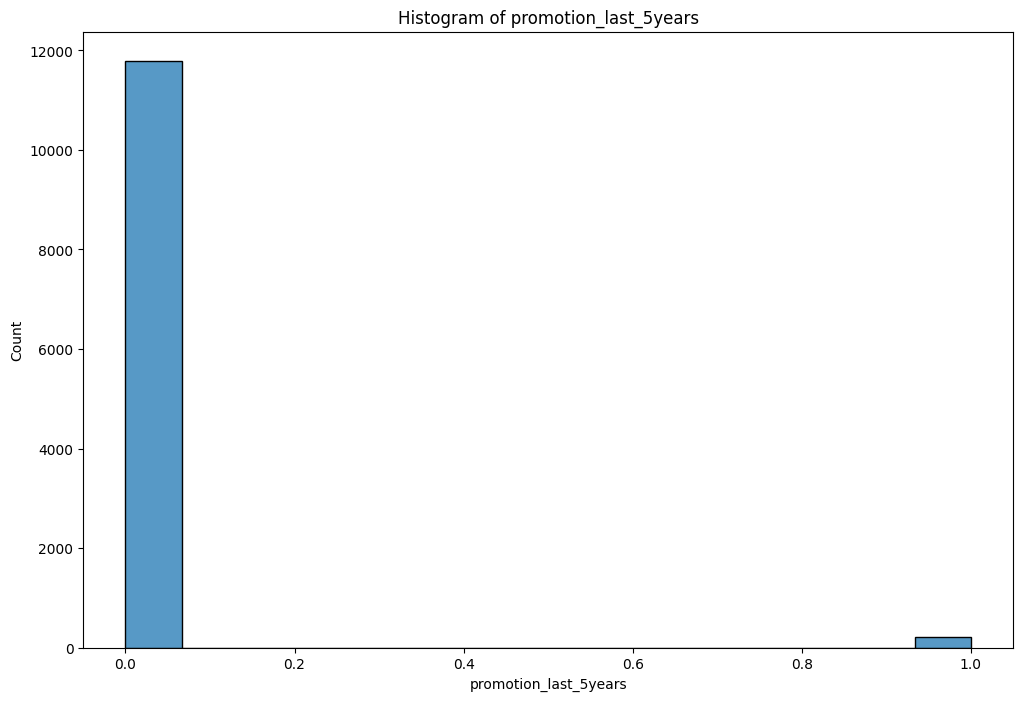

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64
promotion_last_5years
0    0.983071
1    0.016929
Name: proportion, dtype: float64


In [32]:
cat_var('promotion_last_5years')

ONLY `1.7%` of employees received a promotion within the last 5 years. This could be a huge factor why employees are leaving. Based of the `average_monthly_hours` histogram, more than half the employees are working well over average working hours. Clearly employees are being over worked here!

#### **department**

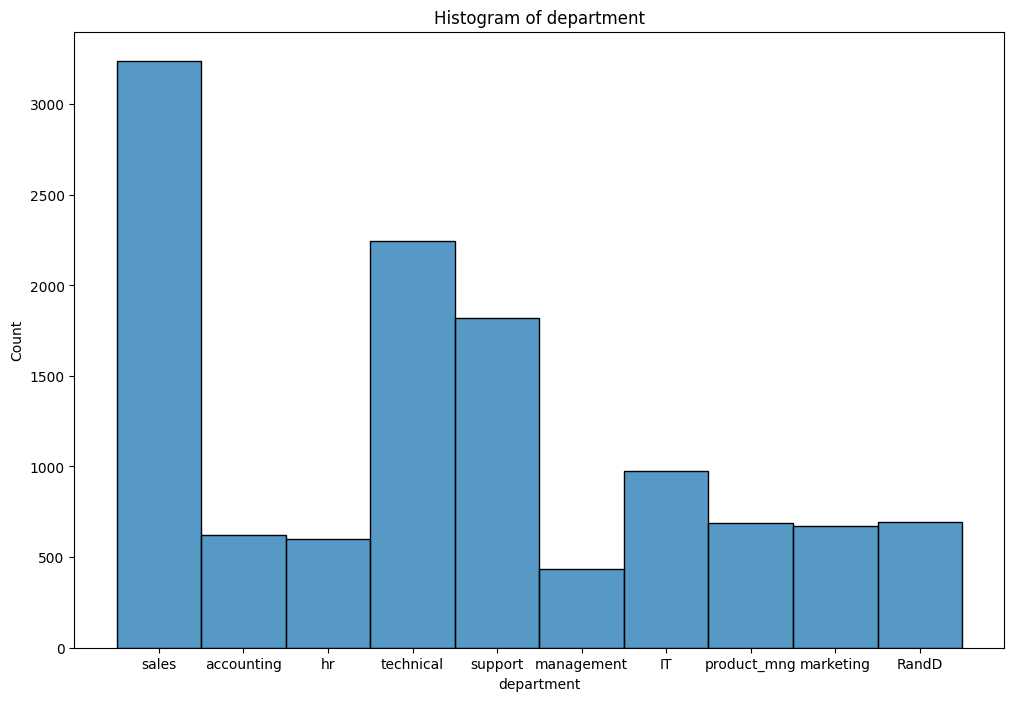

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64
department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64


In [33]:
cat_var('department')

This just gives us a better understanding of the different departments at Salifort Motors and lets us understand the distribution between employees. We can maybe examine `department` with `salary` or even `satisfaction_level` to get a better understanding of why employees may have left.

#### **salary**

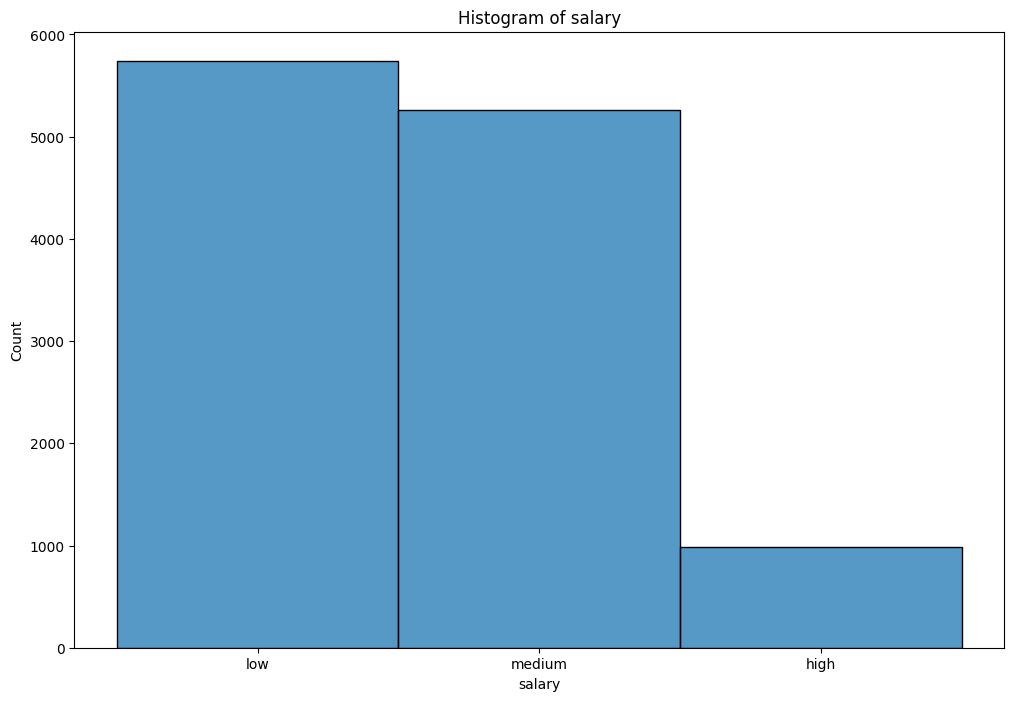

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64
salary
low       0.478692
medium    0.438746
high      0.082562
Name: proportion, dtype: float64


In [34]:
cat_var('salary') 

Only `8.3%` of employees are receiving high salaries where as `low` and `medium` are both roughly around `45%` each.

### **Data Visualization Pt.2**

Let us now generate some more graphs to better understand relationships between variables so we can get a better understanding of the data.

Let’s first start off by inspecting the relationship between the number of projects an employee contributed to the company and if they left or stayed.


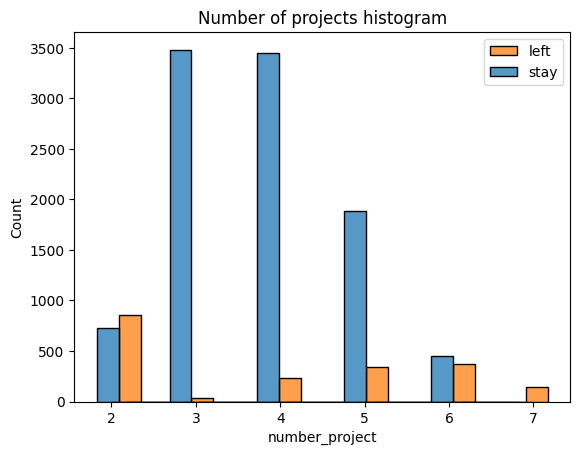

857 employees left while only contributing on 2 projects


In [35]:
sns.histplot(data = df, x = 'number_project', hue='left',multiple = 'dodge',shrink=3)
plt.title('Number of projects histogram')
plt.legend(labels = ['left','stay'])
plt.show()
print(len(df[(df['number_project'] == 2) & (df['left'] == 1)]), 'employees left while only contributing on 2 projects')

* Here we can see 2 groups. Those who worked 2 projects and then those who worked more than 2 projects. For those who worked for 2 projects there is a large number of employees who left (`857` to be exact) which is nearly `43%` of all employees who `left`. 

* The other group is those who contributed to 2 or more projects. When viewing the histogram, we can see a pattern where more employees `left` when they were involved in more projects. Also note that there were `0` employees who `stayed` when an employee contributed on 7 projects. 

Next, we will use a `scatter plot` to see if we can notice any patterns with employees who `left` based on the `number_project` they contributed to and their `average_monthly_hours`

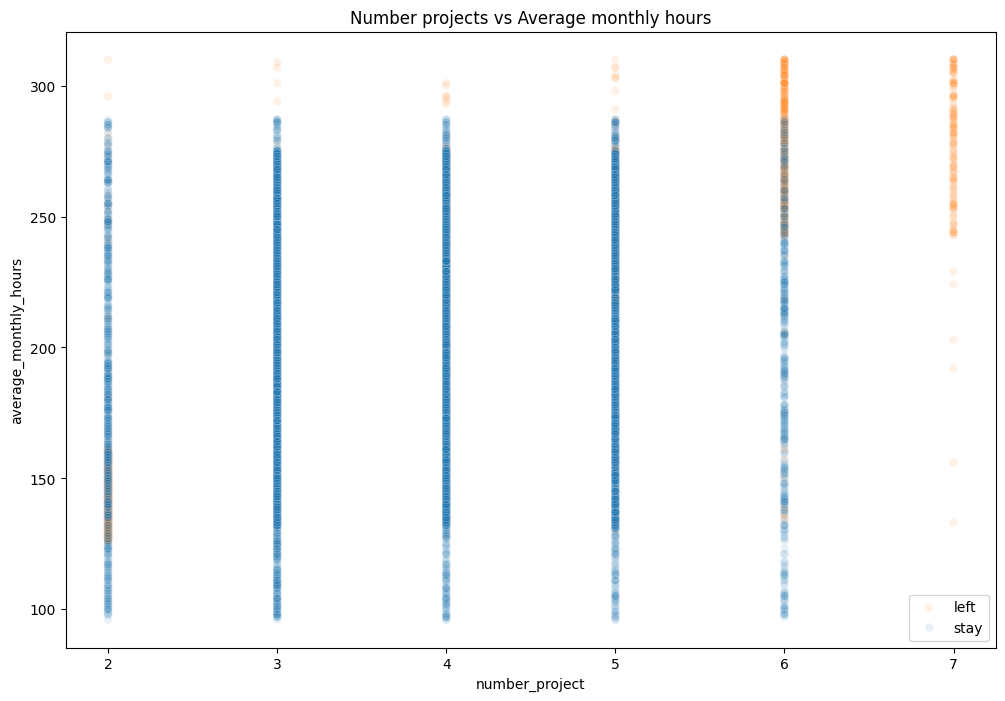

left
1    145
Name: count, dtype: int64


In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = 'number_project', y = 'average_monthly_hours', hue = 'left', alpha = 0.1)
plt.legend(labels = ['left','stay'])
plt.title('Number projects vs Average monthly hours')
plt.show()
print(df[df['number_project'] == 7]['left'].value_counts())

* When we examine this scatter plot, we notice that all employees that `left` are all near the top of each of the respective `number_project` lines. Therefore, its clear that those who worked the most hours with respect to the number of projects that have been worked on are the employees who have `left`.

* We can also see that a group of people who worked around 150hours and worked on 2 projects `left`. This corresponds to the graph above clearly indicating that there were 857 employees who `left` that worked on 2 projects. 

* We can also confirm that all employees that worked on 7 projects all left Salifort Motors. 

We will further prove that employees who worked the most hours are the employees that tend to `leave` by generating a histogram that plots employee's `average_monthly_hours` and whether they `left` using a fillable histogram.

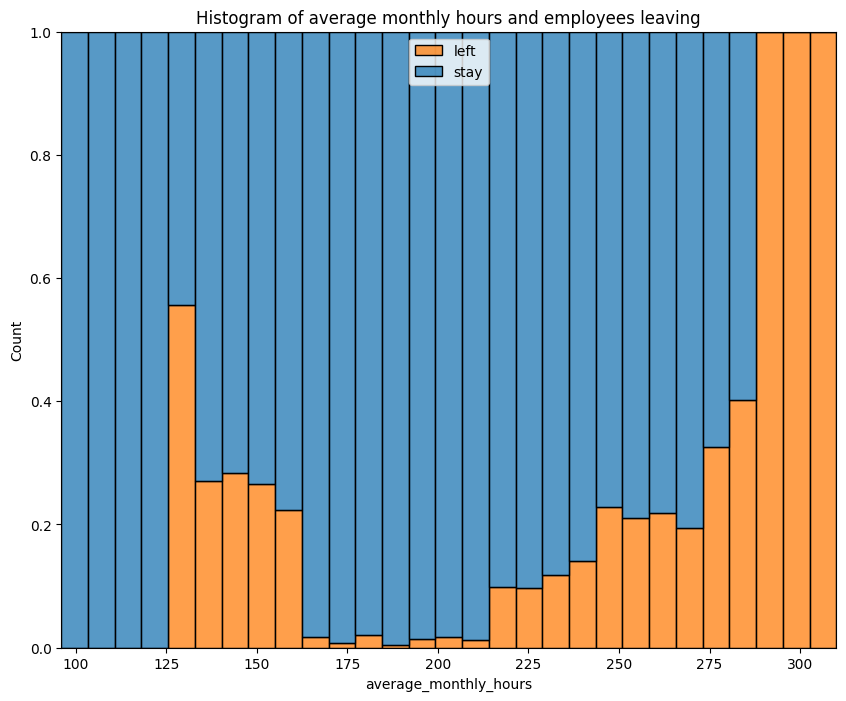

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = 'average_monthly_hours', hue = 'left', multiple = 'fill')
plt.title('Histogram of average monthly hours and employees leaving')
plt.legend(labels = ['left','stay'])
plt.show()

* We can infer that those who worked between 125-165hrs that left are the bunch of employees who worked the 2 projects and left. We can also see that as we increase the average monthly hours an employee works, there are more employees that leave. 
* It comes to a point where those who worked over 280 hours+ all left. 

Let us generate a scatter plot that displays employees `average_monthly_hours` vs `satisfaction_level` and we can also check if they `left` or `stayed`.

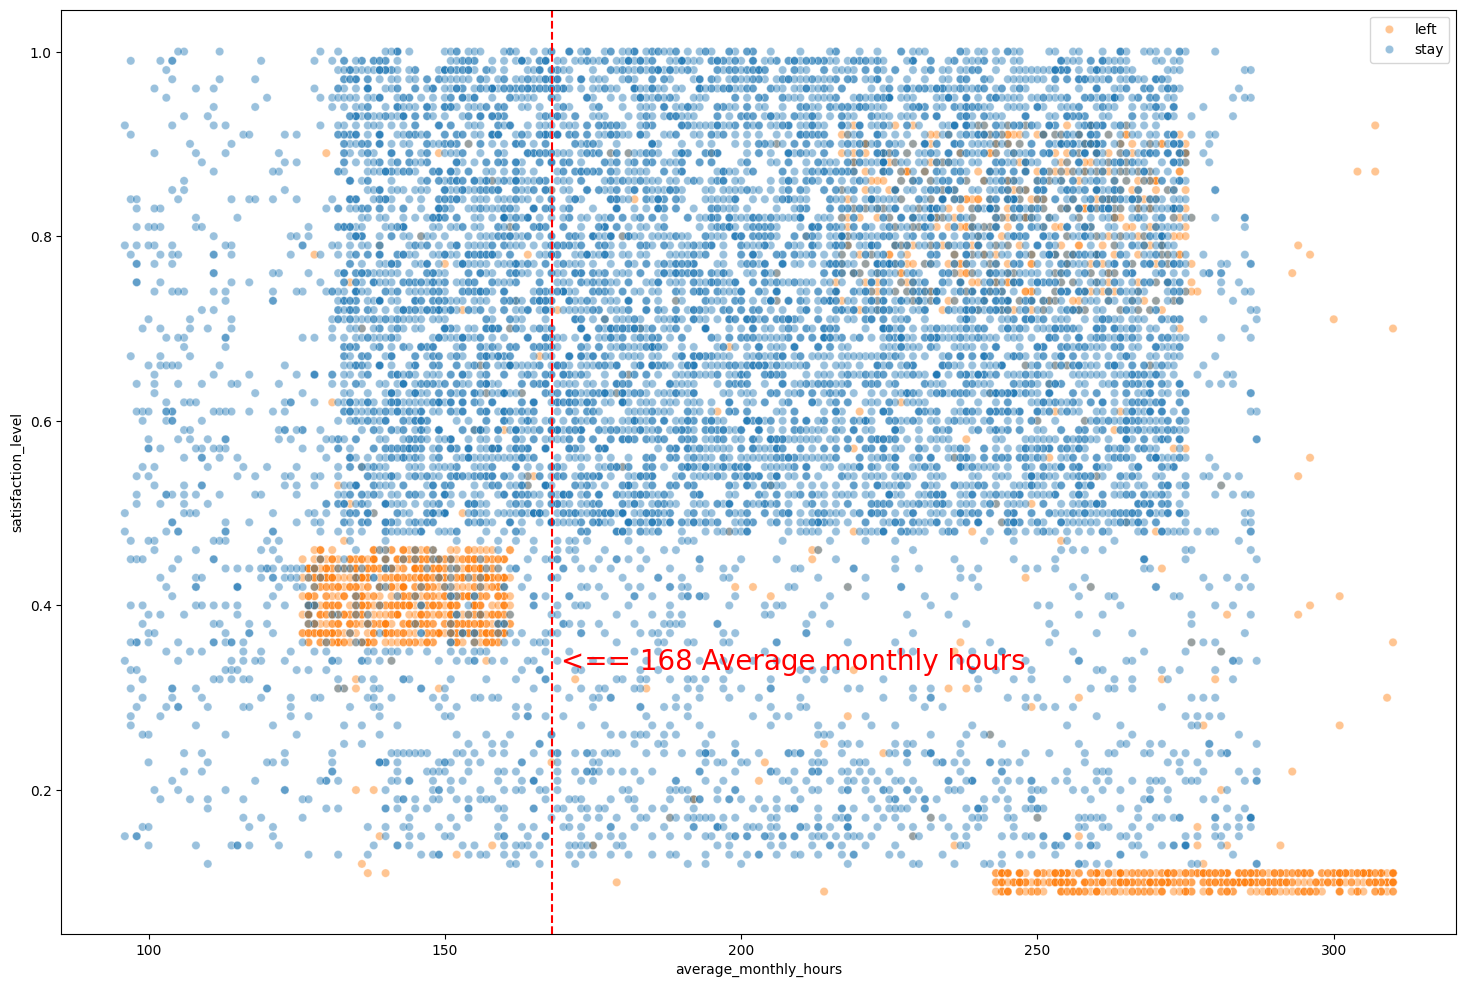

In [38]:
plt.figure(figsize=(18,12))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.45)
plt.axvline(168, color = 'red', linestyle = '--')
plt.text(168, 0.33, ' <== 168 Average monthly hours', color = 'red', size = 20)
plt.legend(labels = ['left','stay'])
plt.show()

When observing this scatter plot, we can see 3 distinct groups of employees who `left`. 

1) The first group are the employees who have an `average_monthly_hour` between 125-170 hours. With this group the `satisfaction_level` seems to be around 0.4 which means they were not satisfied with Salifort Motors. We noted that the average hours worked during the month for a regular employee is roughly 168 hours. Therefore, even though most of these employees were working less hours than the typical 168hours, the employees were still dissatisfied. We also know that this group of employees is predominately the group that worked on 2 projects only. We should inspect whether or not the projects they were working on were difficult ones or simple ones to get a better understanding of why the employees `left`.

2) The second group are the employees on the bottom right of the graph who have a `satisfaction_level` of `0` or `0.1`. Note that these employees all worked well over 250hrs+ during the month where some worked 300hrs (x2 the normal hours of work a month). Clearly these employees felt they were over worked (understandably!), hence why the low `satisfaction_level` score. 

3) The final group is a group that worked around 210-280hours per month but they have a `satisfaction_level` ranging from `0.7` to `0.9`. This is surprising because even though these employees worked much over the typical 160hours per month they were still satisfied with Salifort Motors even after they left. We should further investigate this! (Maybe they had good pay before they left, or worked at a certain department?)

Let’s create a regression plot that showcases employees `satisfaction_level` based on whether they `left` or `stayed`. 

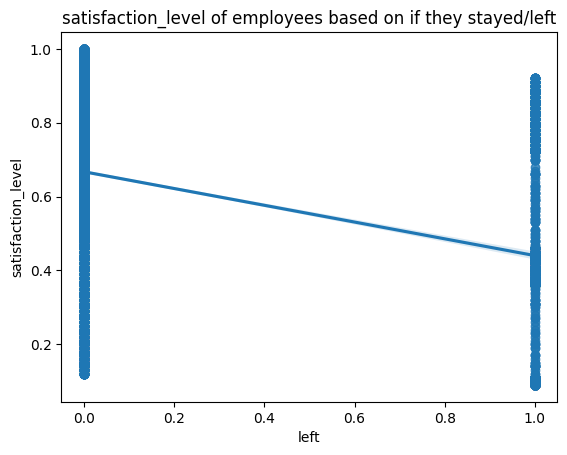

In [39]:
sns.regplot(data = df , x = 'left', y = 'satisfaction_level')
plt.title('satisfaction_level of employees based on if they stayed/left')
plt.show()

* Clearly employees who `left` tend to have lower a `satisfaction_level` than employees who `stayed`. 

Let’s look at a graph showing the salaries of employees based on how long they spent at the company. 

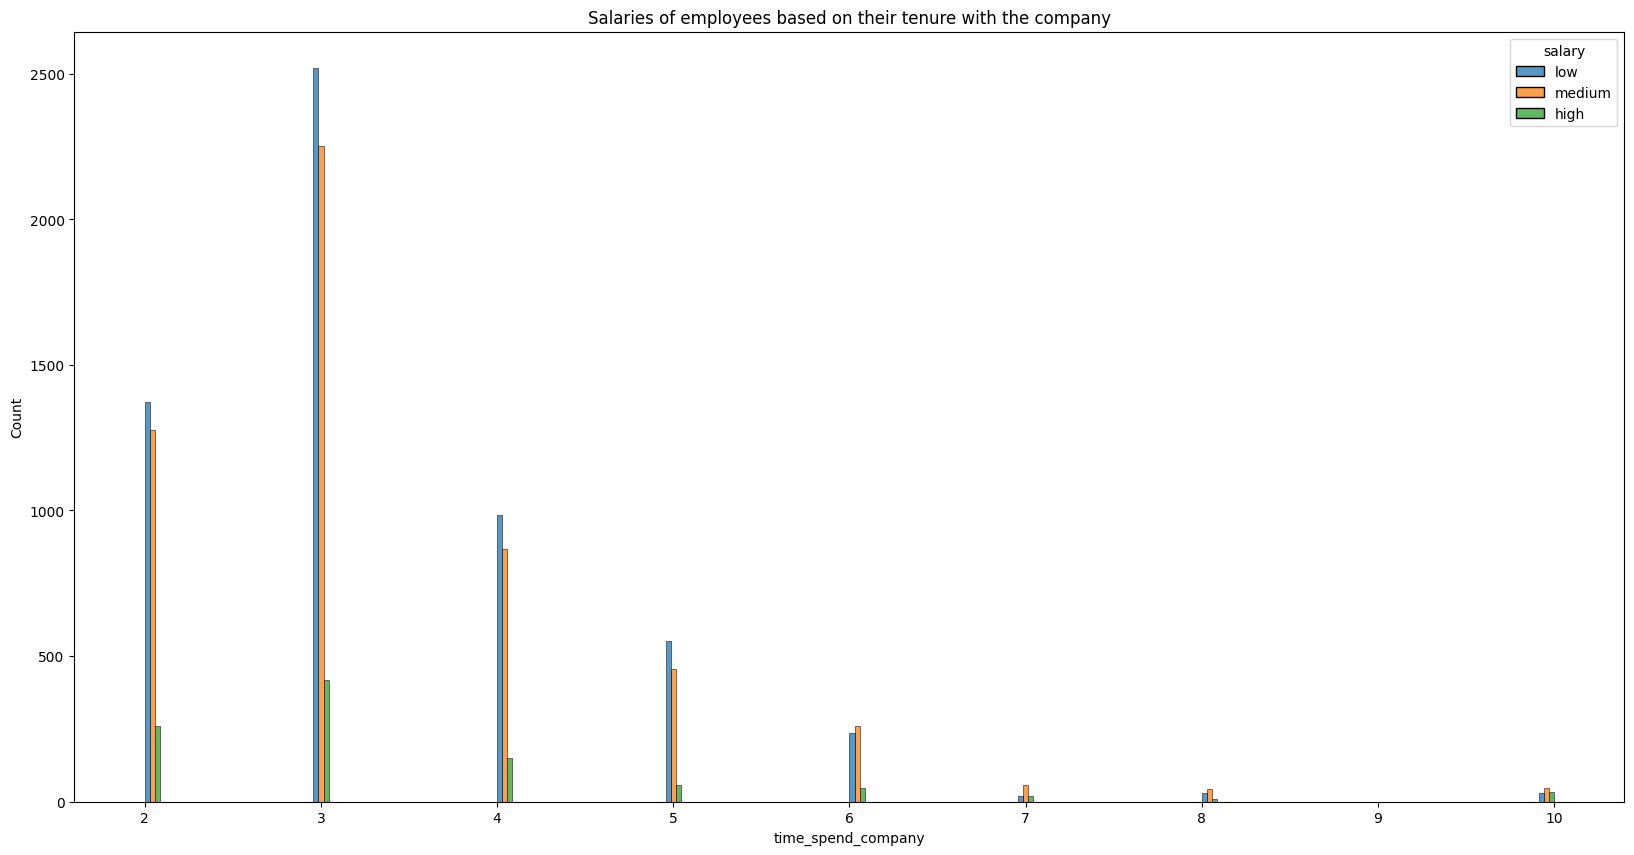

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x =  'time_spend_company', hue = 'salary', hue_order= ['low','medium','high'],
             multiple='dodge')
plt.title('Salaries of employees based on their tenure with the company')
plt.show()

Looks like its difficult for us to really read this graph, lets split it into 2 sperate datasets. We will call those who worked at Salifort Motors for more than 6 years as `long term` and those who worked 6 years or less as `short term`. 

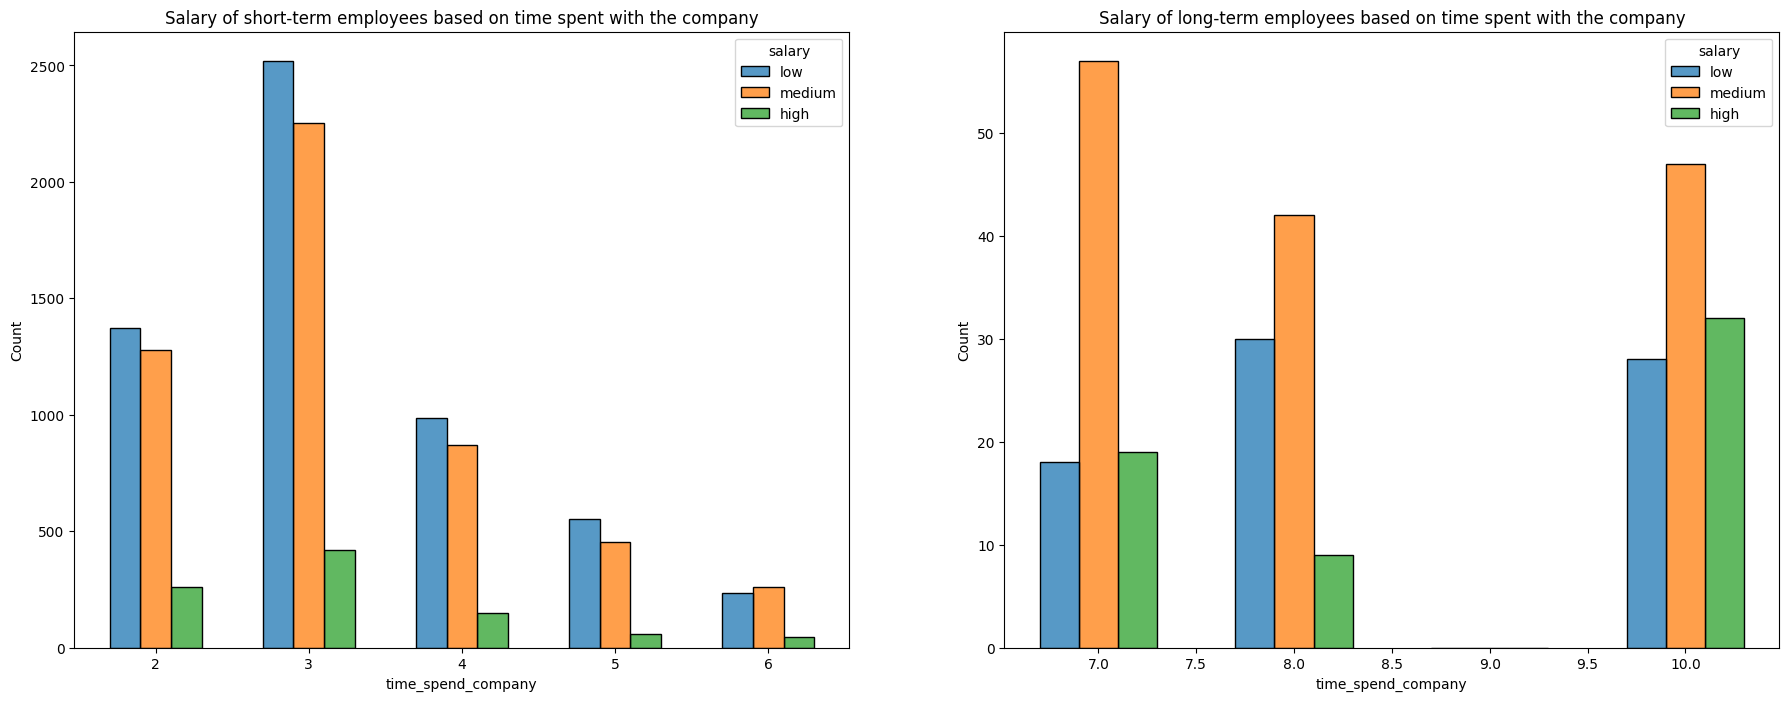

282


In [41]:
long_term = df[df['time_spend_company'] >= 7]
short_term = df[df['time_spend_company'] <= 6]

fig, ax = plt.subplots(1,2, figsize = (22,8))

sns.histplot(data = short_term, x = 'time_spend_company', hue = 'salary', hue_order= ['low','medium','high'],
             multiple = 'dodge', ax = ax[0], discrete=1, shrink = .6)
ax[0].set_title('Salary of short-term employees based on time spent with the company')

sns.histplot(data = long_term, x = 'time_spend_company', hue = 'salary', hue_order= ['low','medium','high'], 
             multiple = 'dodge', ax = ax[1],discrete=1, shrink = .6)
ax[1].set_title('Salary of long-term employees based on time spent with the company')
plt.show()
print(len(long_term))

Now we have a clear image of those who worked `short_term` and those who worked `long_term`. 

`short term`
* Majority of workers between 2-6 years of `time_spend_company` received `low` or `medium` salaries. Most employees received `low` though. 

`long term`
* Seems like most employees received `medium` salaries. 
* Very few employees have more than 7 years of time spent at Salifort Motors. 
* If we examine the y-label of this graph compared to the `short term` graph we can tell that there is a lot less employees who are considered `long term` employees compared to `short term`. In fact, there are actually 282 employees who are considered long term which is only `2.4%` of total employees. 


We can examine `salary` based on `department` as well to see if there’s any correlation. 

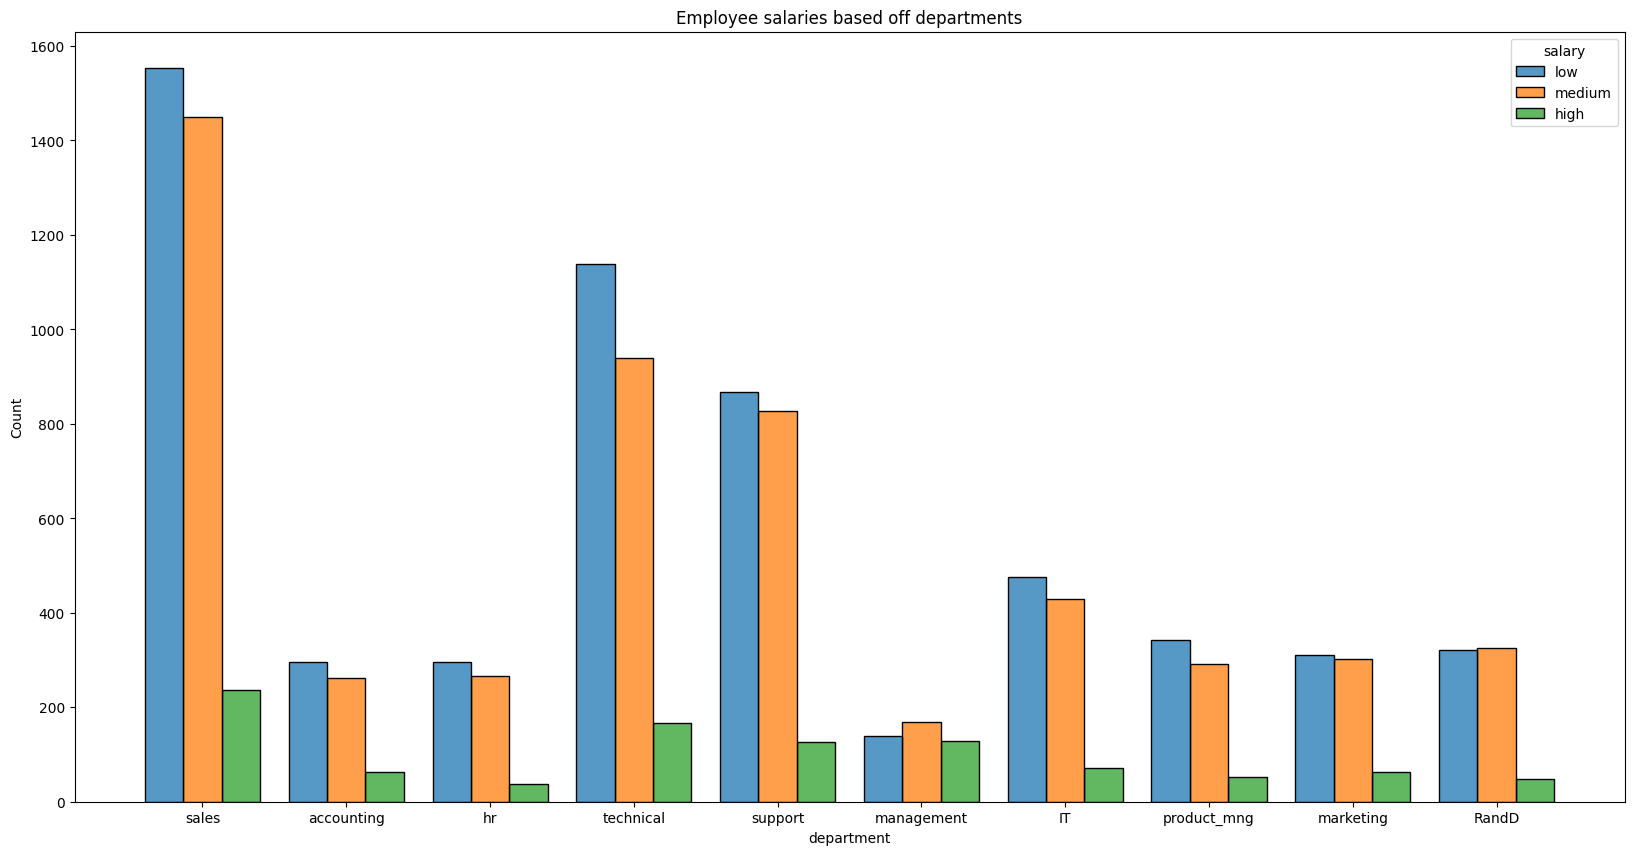

In [42]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x = 'department', hue='salary', multiple='dodge', shrink=.8)
plt.title('Employee salaries based off departments')
plt.show()

* There is not much to really examine other than the fact that most employees under each department are either receiving `low` or `medium` salaries. The only department that seems to have a balance of low, medium and high salaries is `management`. 

Let's check if there are any relationship on employees `satisfaction_level` based off the `department` they worked under. From there we can also examine if they employee `left` or `stayed`.

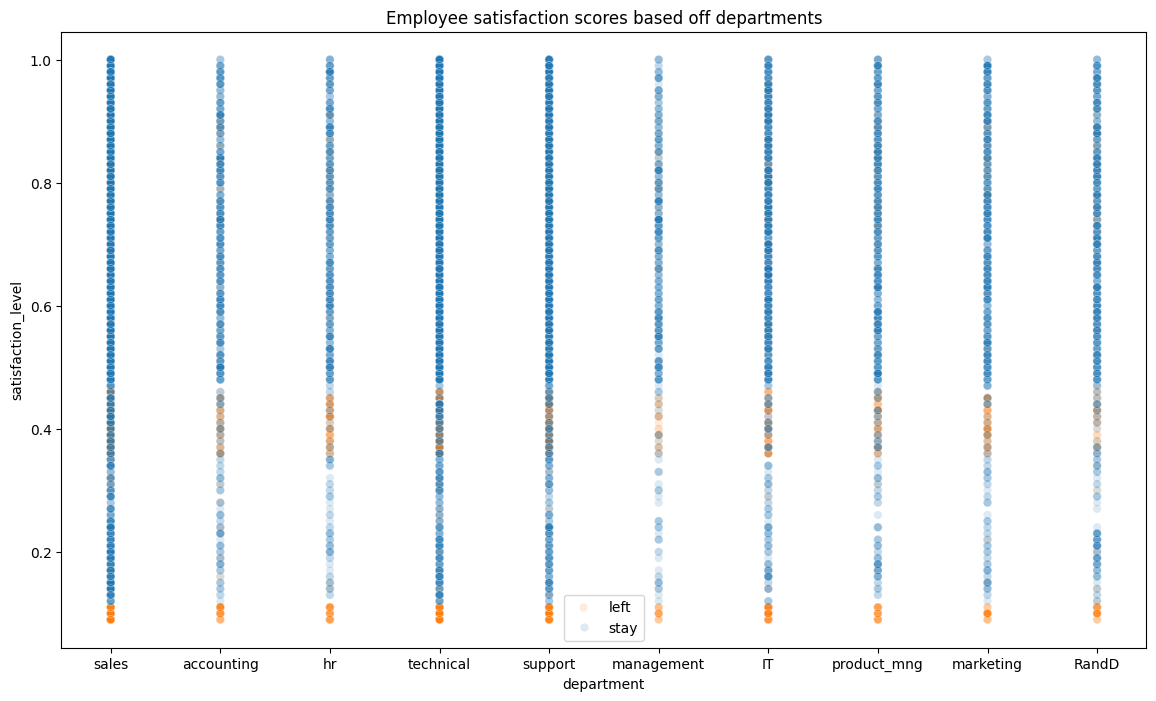

In [54]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = df, x = 'department', y= 'satisfaction_level', hue = 'left', alpha = 0.15)
plt.legend(labels = ['left','stay'])
plt.title('Employee satisfaction scores based off departments')
plt.show()

*  Unfortunately, there is not much that we can deduct from this graph. It seems like there is a relative equal balance of employee’s satisfaction scores throughout all departments and there is not one department that appears to have more employees leaving at higher satisfaction scores (implying they left on good terms within that department). 

* It appears that those who seem to be dissatisfied and `left` either provided a score near `0.1` or `0.4`. 
 

Let’s now examine the variables `promotion_last_5years` and `average_monthly_hours` by creating a scatter plot of these 2 variables and examining whether an employee left or not.

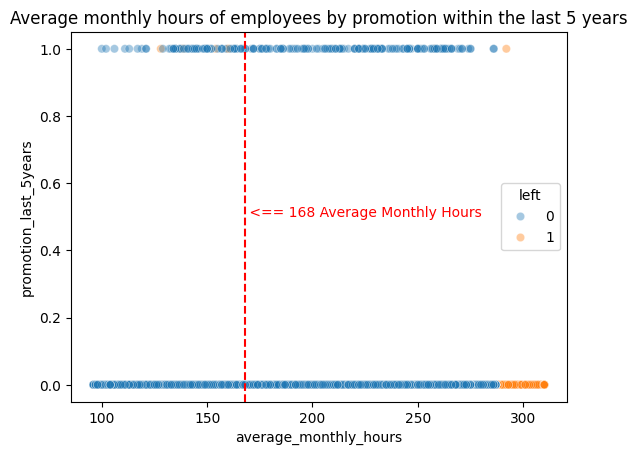

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: count, dtype: int64

promotion_last_5years  left
0                      0       0.831778
                       1       0.168222
1                      0       0.960591
                       1       0.039409
Name: proportion, dtype: float64


In [55]:
sns.scatterplot(data = df, x = 'average_monthly_hours', y= 'promotion_last_5years', hue = 'left', alpha = .4)
plt.title('Average monthly hours of employees by promotion within the last 5 years')
plt.axvline(168, color = 'red', linestyle = '--')
plt.text(168, 0.5, ' <== 168 Average Monthly Hours', color = 'red')
plt.show()
print(df.groupby('promotion_last_5years')['left'].value_counts())
print()
print(df.groupby('promotion_last_5years')['left'].value_counts(normalize=True))


* We can first note that a very few amount of employees have actually been promoted. We saw before that only `1.7%` of employees got promoted within the last 5 years. However, from those `1.7%` of employees that been promoted, `96%` of them `stayed` while `4%` `left. ` 

* In terms of the employees that haven't received promotions within the last 5 years, `83%` of them `stayed` while `17%` `left`.

* When viewing the scatterplot, we can see that most of the employees who worked over 300hours never got promoted and those were the ones that `left` as well. 



Let’s now create a heatmap to see if there are any correlation between the variables. If there are strong correlations between variables, we can only allow 1 of the variables in the model. 


In [56]:
df0 = df.select_dtypes(exclude=[object])

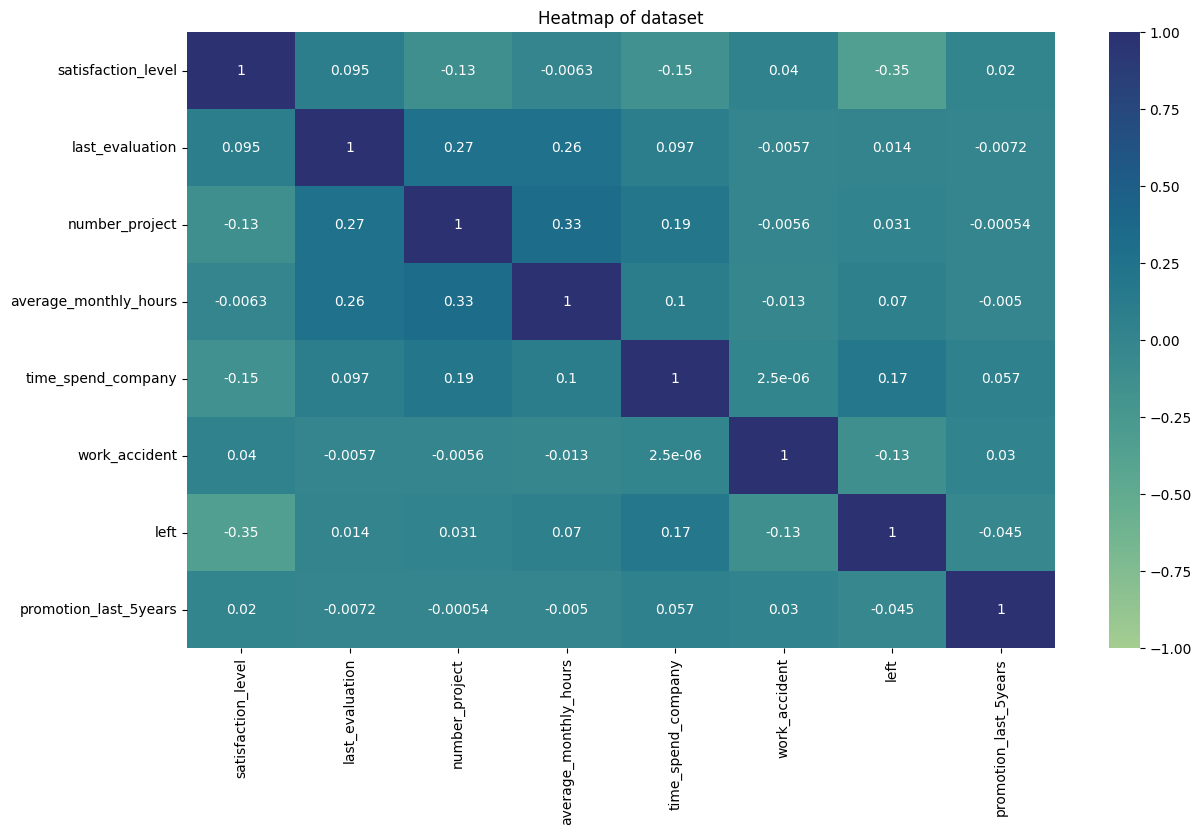

In [57]:
plt.figure(figsize=(14,8))
sns.heatmap(df0.corr('pearson'), vmin= -1,vmax = 1, annot= True, cmap=sns.color_palette('crest', as_cmap= True))
plt.title('Heatmap of dataset')
plt.show()

* The heatmap above give us a Pearson correlation coefficient of each variable. The coefficient ranges from [-1,1] where the closer the value is to 0 the less correlated the 2 variables are. 

* As you can see, `number_project` and `average_monthly_hours` have a correlation score of `0.33` which confirms that there is a correlation between the 2 variables.

* Also, `satisfaction_level` and `left` have a coefficient of `0.35` which suggests that satisfaction score impacts whether or not an employee will leave the company. 

Now that we have a better understanding of the variables and their relationships let's conduct our logistic regression model. 

## **Logistic Regression**

#### **Checking Assumptions**

In order for us to create and interpret this binomial logistic regression model, we must first determine whether or not the following 4 assumptions are met.

1) There are no independent observations
2) No extreme outliers
3) Little to no multicollinearity amongst the X variables
4) There is a linear relationship between each X variable and the logit of the Y variable (`left`)

In terms of the `1st` assumption, the HR department collected the data from all employees from Salifort Motors. Therefore, the observations are all independent. 

For the `2nd` assumption, we will remove all outliers within the dataset once we begin to construct our regression model.

The `3rd` assumption is checked because the heatmap we observed earlier indicated that there was no multicollinearity amongst the x variables. This is due to the fact that none of the variable pairs had an absolute Pearson coefficient value larger than `0.7`. In fact, the largest coefficient value from the heat map is `0.35` which is half of `0.7`. 

Finally, we can check the linear relationship between the X variables and the logit of Y once we construct the model.

#### **Updating variables and removing outliers**

We have 2 categorical variables here, `salary` and `department`. We want to convert these variables to dummy variables so we can use them for modeling. However, notice that the `salary` variable is ordinal (low, medium and high salaries) meaning there is some hierarchy established within the variable. So instead of creating dummy variables for this variable we will convert the variables into numbers from 0 to 2 where:
* 0 = `low`
* 1 = `medium`
* 2 = `high`

In [58]:
df_new = df.copy()
df_new['salary'] = (df_new['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)
df_new = pd.get_dummies(df_new, drop_first=False, dtype=int)
df_new.tail(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11990,0.49,0.49,4,212,7,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11991,0.60,0.53,2,235,7,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0
11993,0.64,0.50,4,253,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11994,0.22,0.94,3,193,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0
11999,0.50,0.73,4,180,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Earlier we discovered that there were some outliers within the `time_spend_company` variable. Since we are creating a logistic regression, it is well known that logistic regression are sensitive to outliers. Therefore, we should remove the outliers so we can perform a logistic regression.

In [59]:
df_logreg = df_new[(df_new['time_spend_company'] >= lower_limit) & (df_new['time_spend_company'] <= upper_limit)]
df_logreg.shape


(11167, 19)

Now that the model has no outliers, assumption `3` is now checked.

#### **Split the Data**

Now that we have our dataset all prepared lets now isolate the variables into `X` and `y` where `y` will be only the `left` variable and `X` will be everything else.

In [60]:
y = df_logreg['left']
X = df_logreg.drop(columns='left', axis=1)

print(y.head())
print(X.head())

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   time_spend_company  work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   
5                   3              0                      0       0   

   department_IT  departme

We will now split the data into a training set and a test set. The training set will be used to generate the binomial logistic model and the test set will be used to test how accurate the model is at predicting whether an employee `left` or `stayed`. 

#### **Fit the model**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, stratify=y, random_state = 14)

In [62]:
model = LogisticRegression(random_state=14, max_iter=500).fit(X_train, y_train)

In [63]:
pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -4.505843
last_evaluation          -0.042216
number_project           -0.452135
average_monthly_hours     0.003549
time_spend_company        1.079935
work_accident            -1.507875
promotion_last_5years    -0.384202
salary                   -0.536300
department_IT            -0.061682
department_RandD         -0.345659
department_accounting    -0.222458
department_hr            -0.122301
department_management    -0.184637
department_marketing     -0.076529
department_product_mng   -0.101186
department_sales         -0.051604
department_support       -0.006834
department_technical      0.073034
dtype: float64

These coefficient values are representing the change in log odds of the variable `left` for every 1 unit increase in the X variable of choice. 

In [64]:
model.intercept_

array([-1.23911479])

Now that we created our model, we can finally check our final assumption. 

In [65]:
training_prob = model.predict_proba(X_train)
training_prob

array([[0.79973414, 0.20026586],
       [0.99041664, 0.00958336],
       [0.97508231, 0.02491769],
       ...,
       [0.96095425, 0.03904575],
       [0.87750971, 0.12249029],
       [0.96813089, 0.03186911]])

In [66]:
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_prob]

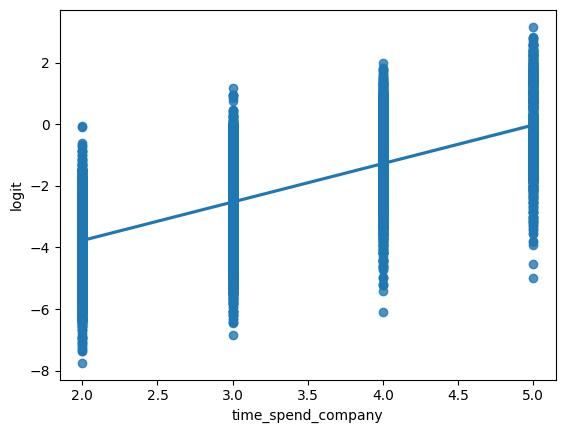

In [67]:
sns.regplot(data = logit_data, x = 'time_spend_company', y= 'logit')
plt.show()

Each X variable has a linear relationship between the logit of Y. For time-sake we are just going to display 1 X variable `time_spend_company` to give a better understanding of what this linear relationship looks like. Now we can finally confirm that assumption `4` is true, we can start to interpret this model.

#### **Confusion Matrix**

In [69]:
y_pred = model.predict(X_test)

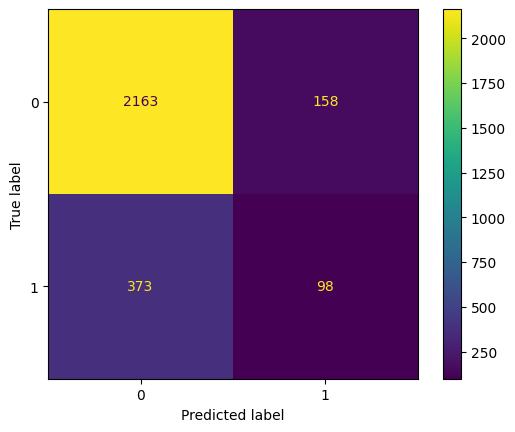

In [70]:
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=model.classes_)
log_disp.plot(values_format='')
plt.show()

In [71]:
print(classification_report(y_test, y_pred, target_names=['Predicited would not leave', 'Predicited would leave']))
print(recall_score(y_test, y_pred))

                            precision    recall  f1-score   support

Predicited would not leave       0.85      0.93      0.89      2321
    Predicited would leave       0.38      0.21      0.27       471

                  accuracy                           0.81      2792
                 macro avg       0.62      0.57      0.58      2792
              weighted avg       0.77      0.81      0.79      2792

0.208067940552017


When we view the classification report, we can see that the precision score is `77%`, the recall score is `81%`, the f1-score is `79%` (precision, recall and f1-score are all weighted) and the accuracy score is `81%`. We will interpret these values below.

Note that the precision score is `77%` for weighted average. What does this exactly mean? When viewing the classification report we get 2 percentages, `85%` for predicating employees would not leave and `38%` for predicting employees would leave. This means that the model is really well off at predicting whether or not an employee would not leave however it is poor at predicting whether an employee would `leave`. 
* This is due to the fact that the model predicts many true negatives but very little true positives in comparison. 

Therefore, if the main importance of the model is to evaluate whether an employee will `leave` then the binomial logistic model is not the best at predicting this and maybe we can consult some data scientist to create a Tree-based model instead using some machine learning. 


#### **Model's important features**

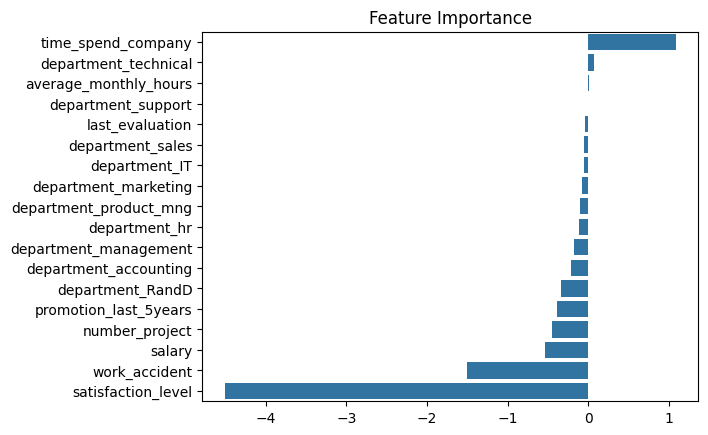

In [72]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse=True)
sns.barplot(x = [x[1] for x in feature_importance],
            y = [x[0] for x in feature_importance],
            orient= 'h')
plt.title('Feature Importance')
plt.show()

The graph above is a representation of the most important features within the model. Clearly `satisfaction_level`, `work_accident` and `time_spend_company` play a big role when it comes to predicting whether or not an employee will stay or leave the company. This was also shown when we observed the coefficient values of each variable once the model was created as these 3 variables had the highest values. This all relates to the graphs we generated earlier showing how `satisfaction_level` showed a major discrepancy in terms of those who stayed vs. those who left Salifort Motors.

## **Final Thoughts**

One thing that we can all agree upon here is that employees are being severally over worked at Salifort Motors. When we examined the graphs that were created, we noticed that those who worked more hours were the ones that left the company as well as the ones who had the lowest satisfaction scores as well. It was also seen that as we increased the number of projects an employee worked on, they were more likely to leave the company. We saw this predominately with the employees who worked on 7 projects where they all left Salifort Motors. 

There were also several of employees who haven’t been promoted and even those who worked for extreme hours, they still were not promoted. This caused employees to leave the company as they were extremely dissatisfied with the company and the lack of willingness to promote their employees. We saw that only `1.7%` of employees were promoted within the last 5 years which is extremely low!


#### **Suggestions**

After a thorough analysis of the dataset, we the data analyst team suggests the following in order to retain the employees:
* Employee’s hours need to be capped where they do not work these extreme number of hours (i.e; 200+ hours a month). We noticed that employees working these large number of hours are the employees most likely to leave the company. 
* Limit the number of projects an employee can contribute too. This will also assist with reducing the number of hours an employee is working as they will have less work to do. Also, we need further more information on why there was such a large number of employees who left while only working on 2 projects. 
* If Salifort Motors wishes to keep their employee working numbers above the average 168hours, then they should consider promoting their employees. We noticed a large drop off of employees after 3 years of working at Salifort Motors. The HR team can consider suggesting a promotion to employees after working 3 years with the company to ensure that employees stay at the company. 
* With regards to the last point, those employees who have been promoted could also see a shift in their salaries going from `low` to `medium`. This will help the company retain their employees as they will be more satisfied with the pay they are receiving. 

